# 2024 Used Car Asking Price Predicition - Finding the Best Predictive Model

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore](#process)
* [<span style="color:#A690A4"> 3. Predict Asking Price](#predict)
* [<span style="color:#A690A4"> 4. Conclusion](#conclusion)

# <span style="color:#5E6997">Executive Summary (temp text only)</span> <a class="anchor" id="exe_sum"></a>

This analysis explores various machine learning models to evaluate their performance on a classification task regarding heart attack prediction. The primary focus was on training and assessing the effectiveness of multiple algorithms to determine the best-performing model. Below is a summary of the approach, methodologies, and results:

### Data Preparation and Exploration
Data Inspection: The dataset was examined using functions like df.info() and df.describe() to understand its structure and basic statistics. Correlation analysis was performed to identify relationships between features and the target variable, guiding feature selection and model development.

### Model Training and Evaluation


Below are the models that were used in training:

**Logistic Regression**
- Used for binary classification tasks.
- Achieved a high accuracy score, indicating effective performance in predicting the target variable.

**k-Nearest Neighbors (k-NN)**
- k-NN was used as a classification tool.
- Implemented with k = 36, **achieving the highest score of 91.8%, along with Support Vector Machines.**

**Gaussian Naive Bayes**
- Assumes features follow a Gaussian distribution.
- Demonstrated strong performance with a high accuracy score, suitable for datasets where this assumption holds true.

**Bernoulli Naive Bayes**
- Designed for binary/boolean features.
- Showcased good accuracy, reflecting its effectiveness for datasets with binary features.

**Support Vector Machine (SVM)**
- A robust classifier for complex datasets.
- Delivered the **highest accuracy score of 91.8% along with k-Nearest Neighbors**, highlighting its capability to handle various classification tasks effectively.

**Random Forest Regressor**
- Typically used for regression tasks, but evaluated here with classification metrics.
- Given its performance metrics, regression-specific evaluations like Mean Absolute Error (MAE) are suggested for more accurate performance assessment.

**XGBoost**
- An advanced gradient boosting method.
- Achieved a lower accuracy score than other models.

# <span style="color:#5E6997">Introduction (temp text)</span> <a class="anchor" id="intro"></a>

In the realm of data science and machine learning, selecting the right model and evaluating its performance is crucial for building effective predictive systems. This code analysis demonstrates a systematic approach to applying and assessing various machine learning algorithms on a classification dataset. The goal is to explore how different models perform and determine their suitability for predicting the target variable.

### Objectives

1. Data Understanding:
    - Inspect and summarize the dataset to grasp its structure, feature distributions, and relationships between variables.
    - Analyze feature correlations to identify key predictors and guide feature engineering.

2. Model Application:
    - Train and evaluate several machine learning models, including Logistic Regression, k-Nearest Neighbors (k-NN), Gaussian Naive Bayes, Bernoulli Naive Bayes, Support Vector Machine (SVM), Random Forest Regressor, and XGBoost.
    - Each model is chosen for its unique characteristics and strengths, providing a comprehensive comparison of performance.

3. Performance Evaluation:
    - Utilize appropriate metrics such as accuracy and confusion matrix to assess model effectiveness.
    - For regression models, evaluate performance using metrics suited for continuous predictions, though accuracy is also calculated for comparative purposes.

### Methodology

1. Data Exploration:
    - Use functions like df.info() and df.describe() to gain insights into the dataset’s attributes and basic statistics.
Generate a correlation matrix and heatmap to visualize relationships between features and the target variable.

2. Model Training:
    - Train various models with the dataset, including both classification and regression algorithms.
For classification models, assess performance based on accuracy, confusion matrix, and other relevant metrics.

3. Model Evaluation:
    - Evaluate and compare model performance using accuracy and confusion matrices to determine how well each model predicts the target variable.
    - Examine specific metrics tailored to each model type, ensuring a comprehensive evaluation.

By systematically applying these methods, this analysis provides a detailed understanding of each model’s capabilities and performance. 

# <span style="color:#5E6997">Collect, Wrangle, and Explore</span> <a class="anchor" id="process"></a>

Load the dataset and look at the first few rows of data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/kaggle/input/used-car-dataset/used_car_dataset.csv')
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


Let's see the total number of rows and columns.

In [2]:
df.shape

(9582, 11)

Let's see if we have any missing values in this table.

In [3]:
df.info()       # Information about columns, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


All of the features except 'kmDriven' are complete.

In [4]:
# Count missing values in 'kmDriven'
missing_values = df.kmDriven.isna().sum()

# Display the result
print(f'The kmDriven feature is missing {missing_values} values')

The kmDriven feature is missing 47 values


Let's see the rows with missing kmDriven and see if we can spot any similarities between the entries.

In [5]:
# Show rows where column kmDriven has missing values
rows_with_missing = df[df['kmDriven'].isna()]

# Display the result
print(rows_with_missing)

              Brand              model  Year  Age kmDriven Transmission  \
231   Maruti Suzuki           Alto-800  2019    5      NaN       Manual   
353          Toyota             Innova  2016    8      NaN       Manual   
444           Honda            City ZX  2024    0      NaN    Automatic   
476         Hyundai        Santro Xing  2010   14      NaN    Automatic   
608          Toyota              Etios  2012   12      NaN       Manual   
793           Skoda             Kushaq  2010   14      NaN    Automatic   
976        Mahindra    Bolero Neo Plus  2015    9      NaN    Automatic   
1164       Mahindra         Bolero Neo  2023    1      NaN       Manual   
1199           Tata             Indica  2014   10      NaN       Manual   
1413        Hyundai        Santro Xing  2007   17      NaN       Manual   
1978           Tata          Tiago Nrg  2021    3      NaN    Automatic   
2680  Maruti Suzuki         Zen-Estilo  2008   16      NaN    Automatic   
2847  Maruti Suzuki      

I'm seeing a lot of 'Maruti Suzuki' entries. I wonder how common this Brand is in India? There are a few rows with this value for Brand in the rows with missing prices. Let's see how many rows have 'Maruti Suzuki' as the Brand in the whole dataset.

In [6]:
# Count rows where model has the value "Maruti Suzuki"
rows_count = (df['Brand'] == 'Maruti Suzuki').sum()
rows_count

2720

OK! That's a lot more than I expected. I don't think we need to worry too much about the large representation of 'Maruti Suzuki' branded cars in the rows with missing prices.

Next, let's remove the rows with missing 'kmDriven' values. We will also clean up the 'kmDriven' and convert it to an integer datatype.

In [7]:
#  Clean up the kmDriven text
df["kmDriven"] = (
    df["kmDriven"]
    .str.replace(",", "", regex=False)
    .str.replace(" km", "", regex=False)
    .astype(float)  # Convert to float
)

# Drop rows with NaN in kmDriven
df = df.dropna(subset=["kmDriven"])

# Convert to integer
df["kmDriven"] = df["kmDriven"].astype(int)

Let's also clean up AskPrice.

In [8]:
#  Clean up the AskPrice text
df["AskPrice"] = (
    df["AskPrice"]
    .str.replace(",", "", regex=False)
    .str.replace("₹", "", regex=False)
    .astype(float)  # Convert to float
)

# Convert to integer
df["AskPrice"] = df["AskPrice"].astype(int)

Let's verify that 'kmDriven' and 'AskPrice' are integers now.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   Age           9535 non-null   int64 
 4   kmDriven      9535 non-null   int64 
 5   Transmission  9535 non-null   object
 6   Owner         9535 non-null   object
 7   FuelType      9535 non-null   object
 8   PostedDate    9535 non-null   object
 9   AdditionInfo  9535 non-null   object
 10  AskPrice      9535 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 893.9+ KB


Indeed they are.
Are the rows with missing values gone?

In [10]:
df.info()       

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   Age           9535 non-null   int64 
 4   kmDriven      9535 non-null   int64 
 5   Transmission  9535 non-null   object
 6   Owner         9535 non-null   object
 7   FuelType      9535 non-null   object
 8   PostedDate    9535 non-null   object
 9   AdditionInfo  9535 non-null   object
 10  AskPrice      9535 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 893.9+ KB


Yes they are! The dataset has no missing values now.

Now we need to look at some of these features and determine the categorical data in them, and how we will need to encode them.

Here are the unique values in each feature. This should give us an indication of which features are categorical.

In [11]:
unique_counts = df.nunique(dropna=False)

# Display the result
print(unique_counts)

Brand             38
model            398
Year              32
Age               32
kmDriven        1745
Transmission       2
Owner              2
FuelType           3
PostedDate        12
AdditionInfo    7270
AskPrice        1326
dtype: int64


It looks like we need to consider the features "Brand", "Model", "Transmission", "Owner", and "FuelType" for encoding.

Let's start by ensuring there are no accidental duplicate entries in "Brand" due to typos.

In [12]:
# Show unique values of Brand
unique_brands = sorted(df["Brand"].unique())

# Display the result
print(unique_brands)

['Ambassador', 'Ashok', 'Aston Martin', 'Audi', 'BMW', 'Bajaj', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'MG', 'Mahindra', 'Maruti Suzuki', 'Maserati', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Porsche', 'Renault', 'Rolls-Royce', 'Skoda', 'Ssangyong', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


Good. They are all unique brands.

Let's check for typos in Year and Age.

In [13]:
# Show unique values of Year
unique_years = sorted(df["Year"].unique())

# Display the result
print(unique_years)

[1986, 1990, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [14]:
# Show unique values of Age
unique_ages = sorted(df["Age"].unique())

# Display the result
print(unique_ages)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 34, 38]


No typos.

Now let's check the unique values of Transmission, Owners, and FuelType.

In [15]:
# Show unique values of Transmission
unique_transmissions = sorted(df["Transmission"].unique())

# Display the result
print(unique_transmissions)

['Automatic', 'Manual']


In [16]:
# Show unique values of Owner
unique_owners = sorted(df["Owner"].unique())

# Display the result
print(unique_owners)

['first', 'second']


In [17]:
# Show unique values of FuelType
unique_fuel_types = sorted(df["FuelType"].unique())

# Display the result
print(unique_fuel_types)

['Diesel', 'Hybrid/CNG', 'Petrol']


These are indeed are categorical features.

**Columns to be dropped from the dataset:**
* AdditionalInfo - Despite the high score, this contains redundant information found elsewhere in the dataset.
* Age - Essentially contains the same information as 'Year'.
* PostedDate - Has insignificant contributions to the target.

In [18]:
df = df.drop(columns=['AdditionInfo', 'PostedDate', 'Age'])

BoxPlot for Asking Price

**Columns needing more research:**
* Transmission
* FuelType
* Owner

Let's plot the average AskPrice by Transmission type.

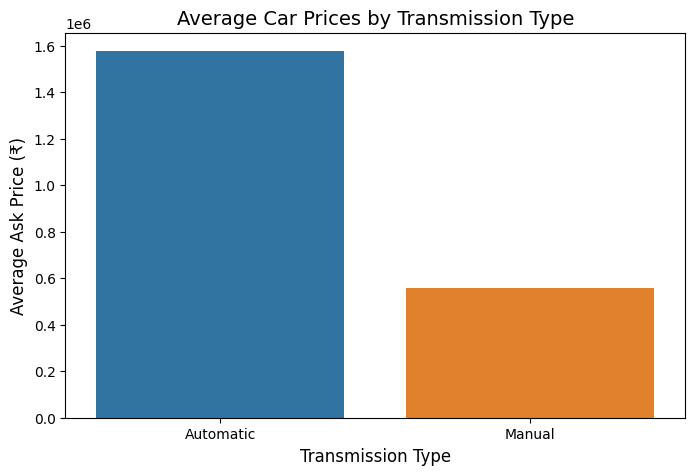

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by transmission type and calculate average price
price_trends_by_transmission = (
    df.groupby('Transmission')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by transmission
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_transmission, 
    x='Transmission', 
    y='AskPrice'
)
plt.title('Average Car Prices by Transmission Type', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

Wow! There is a BIG difference between Automatic and Manual Transmission types. We will keep this feature.

What about the Owner feature?

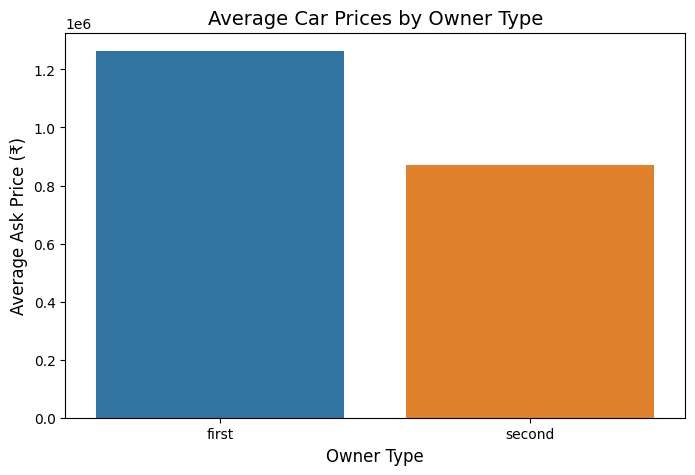

In [20]:
# Group by owner type and calculate average price
price_trends_by_owner = (
    df.groupby('Owner')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by owner
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_owner, 
    x='Owner', 
    y='AskPrice'
)
plt.title('Average Car Prices by Owner Type', fontsize=14)
plt.xlabel('Owner Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

There is a significant difference in the AskPrice for first and second owners. We will also keep this feature.  

Last, let's examine FuelType.

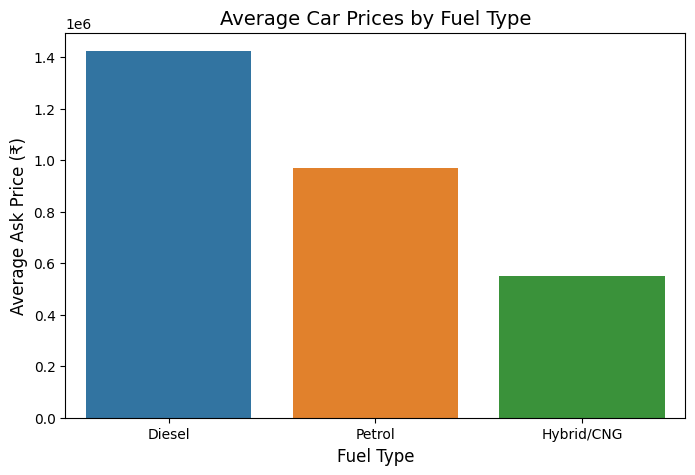

In [21]:
# Group by fuel type and calculate average price
price_trends_by_fuel_type = (
    df.groupby('FuelType')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by fuel type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_fuel_type, 
    x='FuelType', 
    y='AskPrice'
)
plt.title('Average Car Prices by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

There is a large difference between average asking prices for these three FuelTypes, si we will keep this feature. Surprisingly, Hybrid/CNG is lowest average AskPrice even as Hybrid cars are quite expensive. However, Compressed Natural Gas (CNG) vehicles can be quite inexpensive, and appear to make up a more significant portion of the dataset than more expensive Hybrid cards.

Just for fun, let's see the average asking price for each Brand.

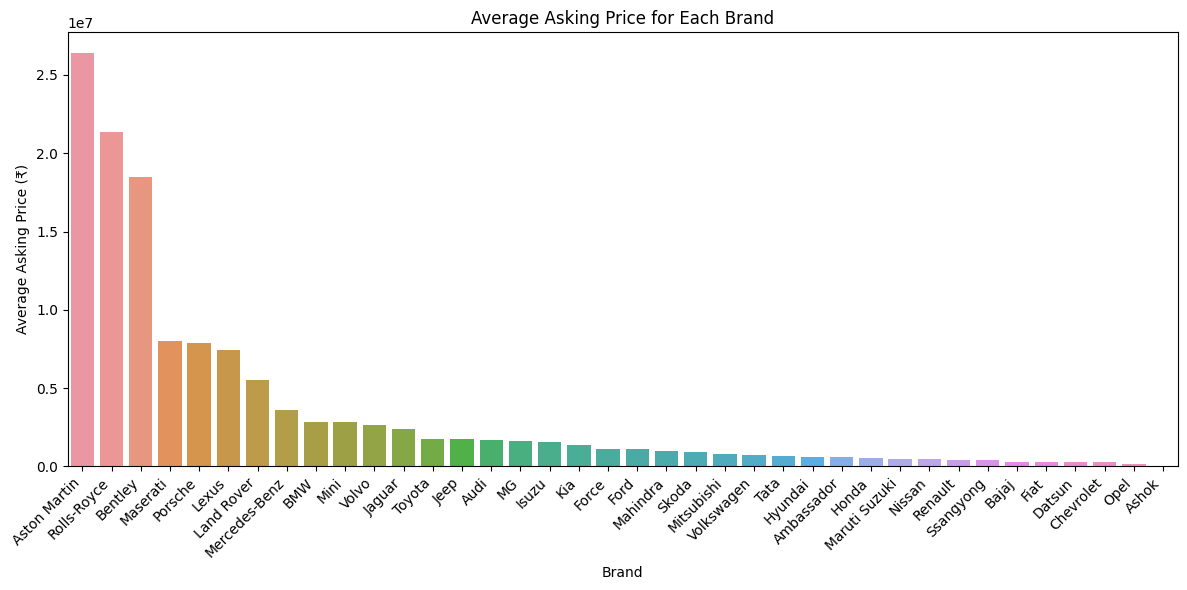

In [22]:
# Calculate the average asking price for each brand
brand_avg_price_summary = df.groupby('Brand')['AskPrice'].mean().reset_index()

# Sort the data for better visualization
brand_avg_price_summary = brand_avg_price_summary.sort_values(by='AskPrice', ascending=False)

# Create a seaborn bar plot for the average asking price by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_avg_price_summary, x='Brand', y='AskPrice')
plt.title('Average Asking Price for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Average Asking Price (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can see that a vast majority of car brands have an average AskPrice that is relatively low. Only a few brands have large AskPrices.

Now let's look at the total AskPrice for each Brand.

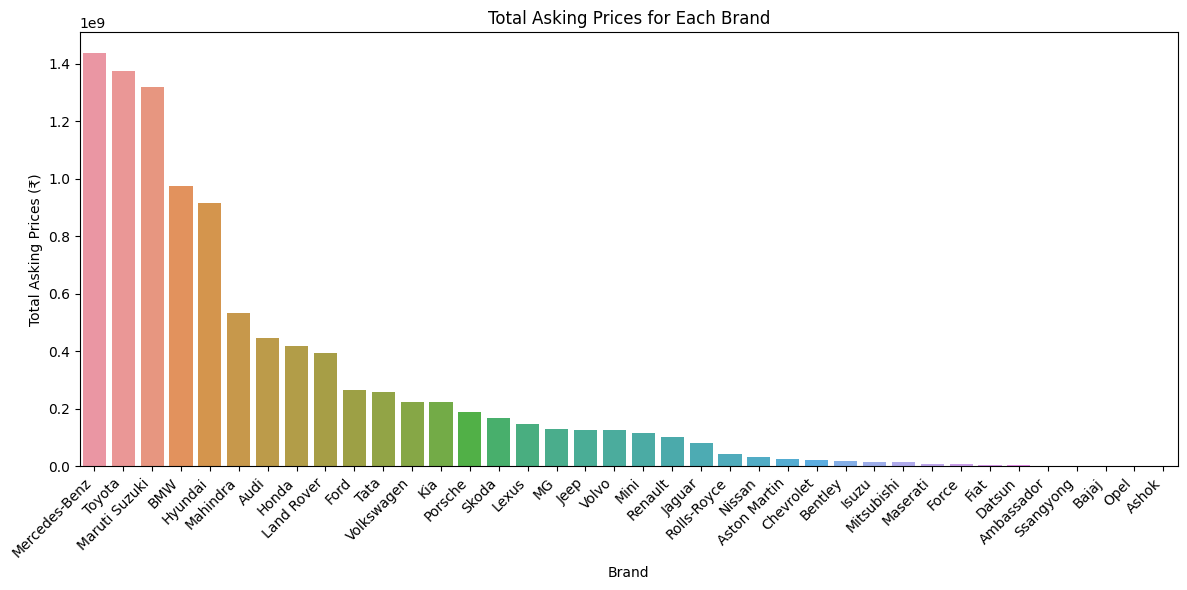

In [23]:
# Recalculate the total AskPrice by Brand
brand_price_summary = df.groupby('Brand')['AskPrice'].sum().reset_index()

# Sort the data for better visualization
brand_price_summary = brand_price_summary.sort_values(by='AskPrice', ascending=False)

# Create a seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_price_summary, x='Brand', y='AskPrice')
plt.title('Total Asking Prices for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Total Asking Prices (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now let's look at the total units sold of each Brand.

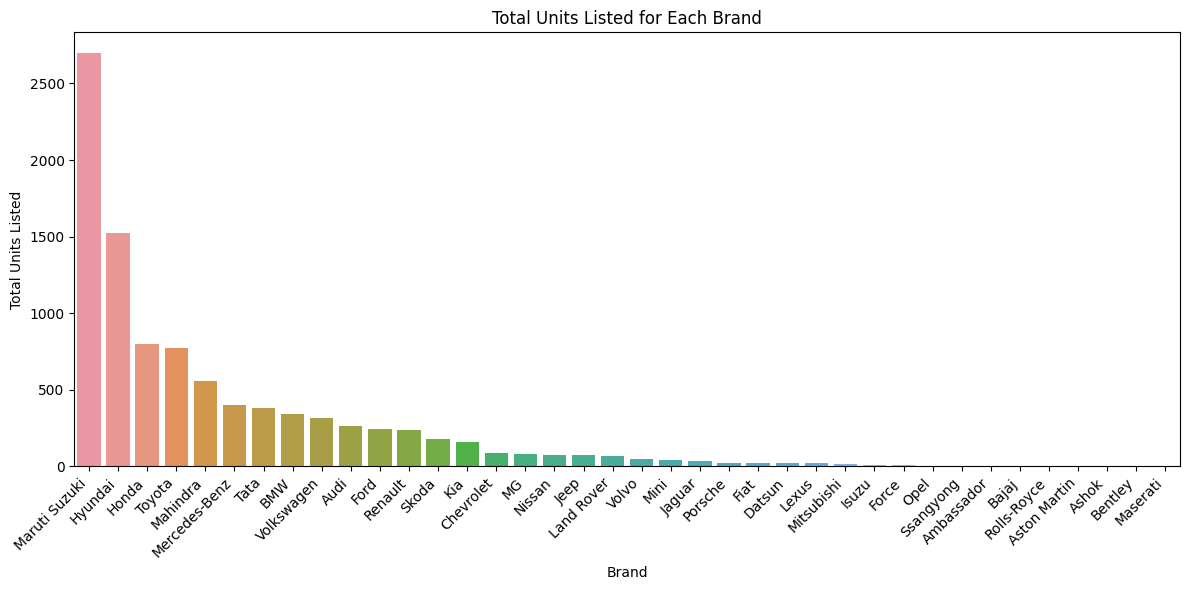

In [24]:
# Count the total units sold (assuming each row represents one unit sold)
brand_units_summary = df['Brand'].value_counts().reset_index()
brand_units_summary.columns = ['Brand', 'TotalUnitsSold']

# Sort the data for better visualization
brand_units_summary = brand_units_summary.sort_values(by='TotalUnitsSold', ascending=False)

# Create a seaborn bar plot for total units sold by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_units_summary, x='Brand', y='TotalUnitsSold')
plt.title('Total Units Listed for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Total Units Listed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Let's look at a few scatter plots to check and see if this data is linear. We can also check visually for outliers at the same time.

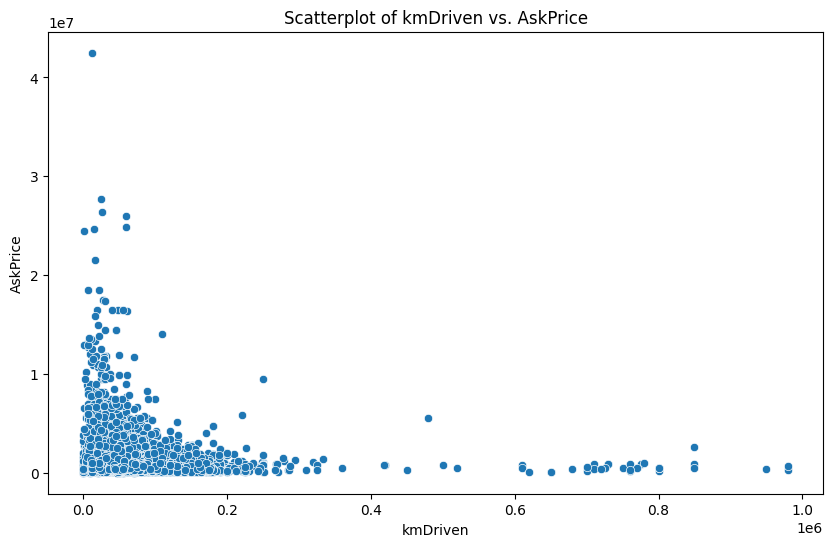

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot to identify outliers in 'kmDriven' vs. 'AskPrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['kmDriven'], y=df['AskPrice'])
plt.title('Scatterplot of kmDriven vs. AskPrice')
plt.show()

I would like to remove some outliers.

In [26]:
df.shape

(9535, 8)

9535 rows.

In [27]:
from scipy.stats import zscore

# Calculate Z-Scores
df['Z-Score'] = zscore(df['AskPrice'])

# Filter out outliers with |Z-Score| > 3
df = df[np.abs(df['Z-Score']) <= 3]

# Drop the 'Z-Score' column.
df = df.drop(columns=['Z-Score'])

In [28]:
df.shape

(9373, 8)

9373 rows left.

In [29]:
print(f'Percentage of rows dropped as Outliers: {100 * (9535 - 9373) / 9535:.2f}%')

Percentage of rows dropped as Outliers: 1.70%


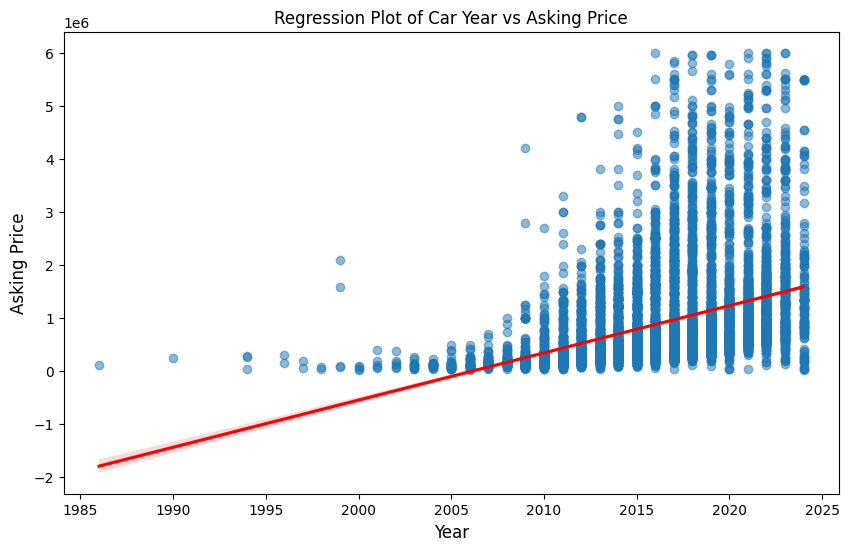

In [30]:
# Regression plot with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Year', y='AskPrice', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression Plot of Car Year vs Asking Price')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Asking Price', fontsize=12)
plt.show()

Use PairPlot to see relationships between the numerical features and the Asking Price.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


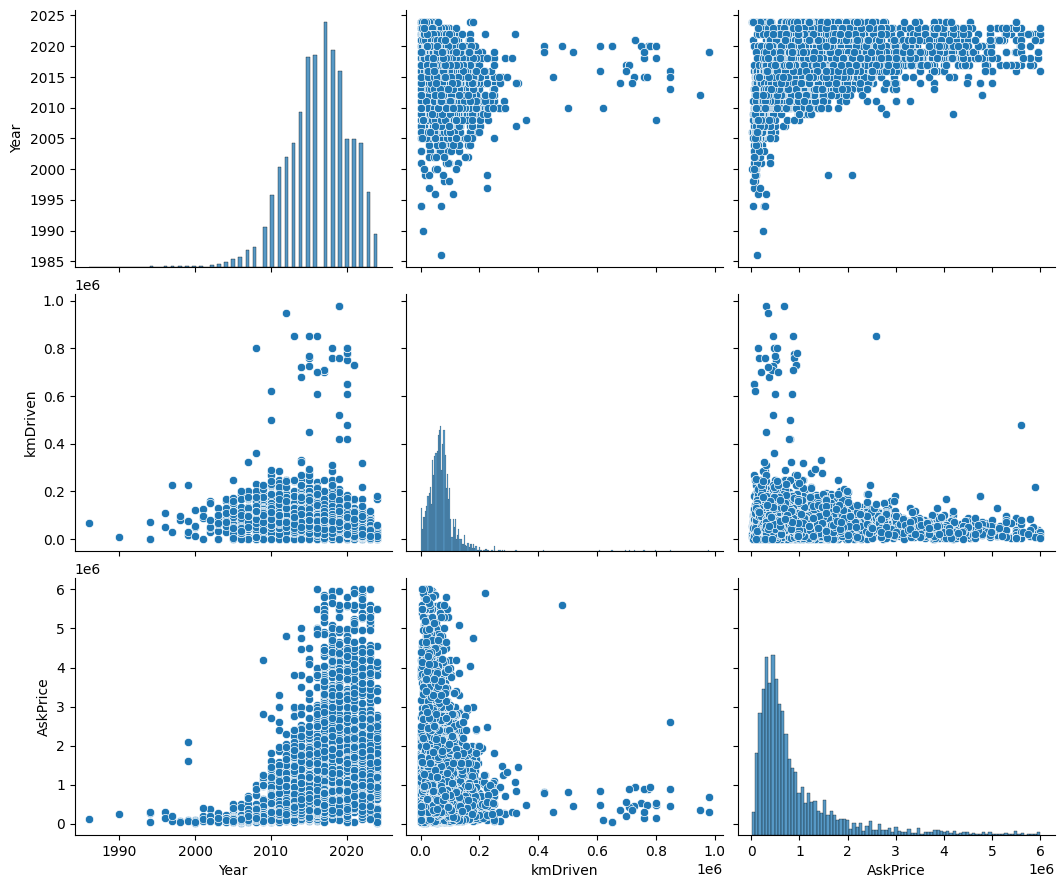

In [31]:
# Select numerical features for pairplot
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Pairplot of numerical features including the target
sns.pairplot(df, vars=numerical_features, y_vars=['AskPrice'], height=3, aspect=1.2)
plt.show()

Now we need to encode some of the features. First, we separate numerical and categorical columns.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9373 entries, 0 to 9581
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9373 non-null   object
 1   model         9373 non-null   object
 2   Year          9373 non-null   int64 
 3   kmDriven      9373 non-null   int64 
 4   Transmission  9373 non-null   object
 5   Owner         9373 non-null   object
 6   FuelType      9373 non-null   object
 7   AskPrice      9373 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 659.0+ KB


Let's use PairPlot again to see if the encoded versions of 'model' and 'Brand' show more relationships between the numerical features.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


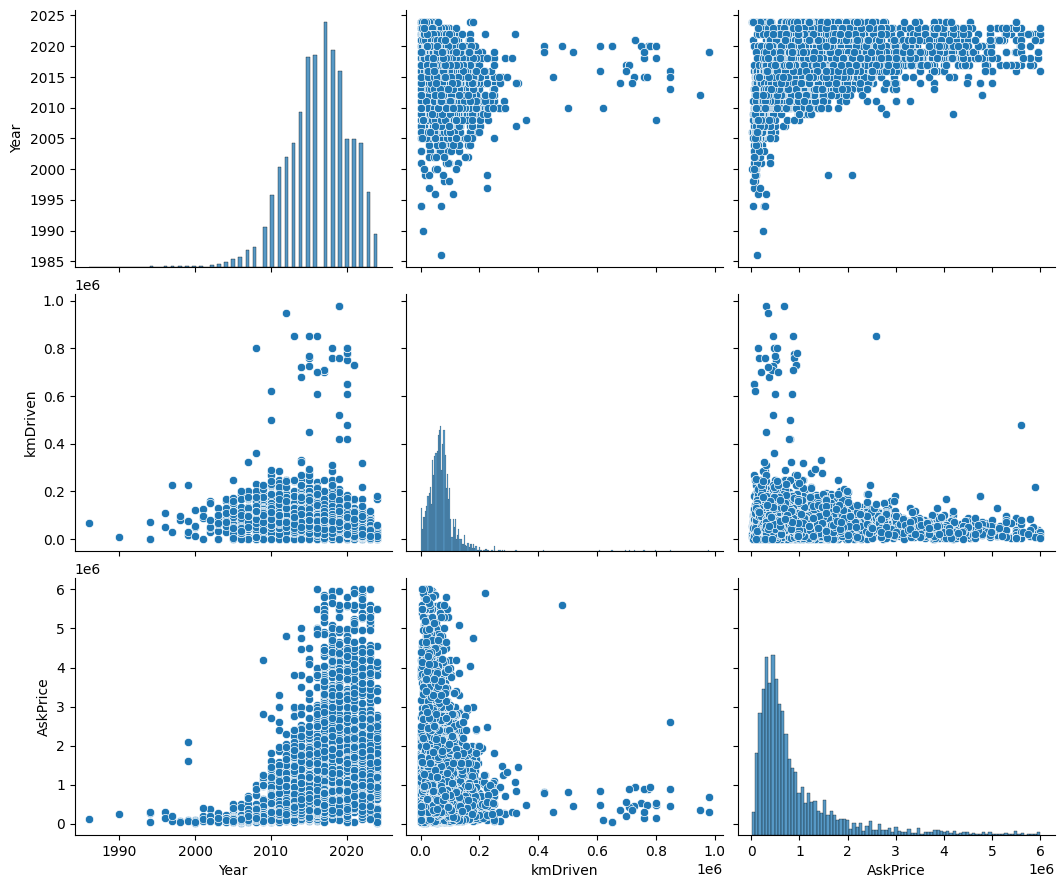

In [33]:
# Select numerical features for pairplot
pairplot_num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Pairplot of numerical features including the target
sns.pairplot(df, vars=pairplot_num_features, y_vars=['AskPrice'], height=3, aspect=1.2)
plt.show()

Define the numerical features.

In [34]:
numerical_features = ['Year', 'kmDriven', 'AskPrice', 'model_encoded',
                      'Brand_encoded', 'km_per_year', 'brand_model_interaction']  
categorical_features = ['Transmission', 'FuelType', 'Owner']

Define the X and y variables.

In [35]:
df.columns

Index(['Brand', 'model', 'Year', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'AskPrice'],
      dtype='object')

In [36]:
df.head()

,Brand,model,Year,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,2001,98000,Manual,second,Petrol,195000
1,Toyota,Innova,2009,190000,Manual,second,Diesel,375000
2,Volkswagen,VentoTest,2010,77246,Manual,first,Diesel,184999
3,Maruti Suzuki,Swift,2017,83500,Manual,second,Diesel,565000
4,Maruti Suzuki,Baleno,2019,45000,Automatic,first,Petrol,685000


In [37]:
X = df.drop(columns=['AskPrice'])  # Replace 'AskPrice' with your target column
y = df['AskPrice']  # Replace 'AskPrice' with your target column

Now that we have X and y data, let's see the Mutual Information for the current features, including the encoded 'model' and 'Brand'.

Split the dataset into train and test data.

**Do Before Splitting:**
1. Cleaning (missing values, outliers).
2. Irrelevant feature removal.
3. Feature engineering.

**Do After Splitting:**
1. ✔ Scaling/normalization.
2. ✔ Encoding categorical variables.
3. ✔ Target encoding.
4. Feature selection.

In [38]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

### One-Hot encoding for low-cardinality categorical features.

In [39]:
columns = X_train.columns

In [40]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Get the actual column names from the encoder
columns = encoder.get_feature_names_out(categorical_features)

# Convert the encoded data back to a DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=columns)

# Repeat for the test data
X_test_encoded = encoder.transform(X_test[categorical_features])
X_test_encoded = pd.DataFrame(X_test_encoded, columns=columns)


In [41]:
X_test

,Brand,model,Year,kmDriven,Transmission,Owner,FuelType
1768,Mahindra,Jeep,1990,9000,Manual,second,Diesel
5503,Mahindra,Thar,2023,49000,Manual,first,Diesel
8256,Volkswagen,Polo,2013,61000,Automatic,first,Petrol
1872,Ford,Ecosport,2017,57000,Manual,first,Diesel
6286,Maruti Suzuki,Wagon-R,2019,48055,Manual,first,Petrol
...,...,...,...,...,...,...,...
3284,Maruti Suzuki,Baleno,2023,40600,Manual,first,Petrol
5054,Maruti Suzuki,Wagon-R,2020,62000,Manual,first,Petrol
3757,Hyundai,Verna,2021,30000,Manual,first,Diesel
6150,Honda,CRV,2007,91000,Automatic,first,Hybrid/CNG


In [42]:
X_test_encoded

,Transmission_Automatic,Transmission_Manual,FuelType_Diesel,FuelType_Hybrid/CNG,FuelType_Petrol,Owner_first,Owner_second
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
1870,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1871,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1872,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1873,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Re-start indexes.

In [43]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Combine dataframes.

In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         1875 non-null   object
 1   model         1875 non-null   object
 2   Year          1875 non-null   int64 
 3   kmDriven      1875 non-null   int64 
 4   Transmission  1875 non-null   object
 5   Owner         1875 non-null   object
 6   FuelType      1875 non-null   object
dtypes: int64(2), object(5)
memory usage: 102.7+ KB


In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7498 entries, 0 to 7497
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         7498 non-null   object
 1   model         7498 non-null   object
 2   Year          7498 non-null   int64 
 3   kmDriven      7498 non-null   int64 
 4   Transmission  7498 non-null   object
 5   Owner         7498 non-null   object
 6   FuelType      7498 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.2+ KB


In [46]:
# Combine the DataFrames using an outer join
X_train = pd.concat([X_train, X_train_encoded], axis=1, join='outer')
X_test = pd.concat([X_test, X_test_encoded], axis=1, join='outer')

Drop text-based columns.

In [47]:
X_train.drop(columns=['Transmission', 'Owner', 'FuelType'], inplace=True)
X_test.drop(columns=['Transmission', 'Owner', 'FuelType'], inplace=True)

In [48]:
X_train.shape

(7498, 11)

In [49]:
X_test.shape

(1875, 11)

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7498 entries, 0 to 7497
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   7498 non-null   object 
 1   model                   7498 non-null   object 
 2   Year                    7498 non-null   int64  
 3   kmDriven                7498 non-null   int64  
 4   Transmission_Automatic  7498 non-null   float64
 5   Transmission_Manual     7498 non-null   float64
 6   FuelType_Diesel         7498 non-null   float64
 7   FuelType_Hybrid/CNG     7498 non-null   float64
 8   FuelType_Petrol         7498 non-null   float64
 9   Owner_first             7498 non-null   float64
 10  Owner_second            7498 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 644.5+ KB


## Target Encoding 

The 'model' and 'Brand' features have very high cardinality in a relatively small dataset. For this reasons, we will use Target Encoding on these features.

In [51]:
# Define a function for target encoding with smoothing
def target_encode(train, test, feature, target, smoothing=10):
    """
    Performs target encoding on a categorical feature with smoothing.
    
    Args:
        train (pd.DataFrame): Training data.
        test (pd.DataFrame): Testing data.
        feature (str): Categorical feature to be target encoded.
        target (str): Target variable in the training data.
        smoothing (int): Smoothing factor to balance category mean with global mean.
    
    Returns:
        pd.Series, pd.Series: The target encoded feature for training and testing.
    """
    # Calculate global mean of the target
    global_mean = train[target].mean()
    
    # Calculate the mean and count for each category
    agg = train.groupby(feature)[target].agg(['mean', 'count'])
    mean = agg['mean']
    count = agg['count']
    
    # Apply smoothing formula
    smoothed_mean = (count * mean + smoothing * global_mean) / (count + smoothing)
    
    # Map the smoothed means to training and testing sets
    train_encoded = train[feature].map(smoothed_mean)
    test_encoded = test[feature].map(smoothed_mean)
    
    # Fill NaN in test_encoded with the global mean
    test_encoded = test_encoded.fillna(global_mean)
    
    return train_encoded, test_encoded

# Ensure 'AskPrice' is numeric in the training data
X_train['AskPrice'] = y_train  # Add target column temporarily to X_train if not included

# Apply target encoding to the 'model' feature
X_train['model_encoded'], X_test['model_encoded'] = target_encode(
    train=X_train, 
    test=X_test, 
    feature='model', 
    target='AskPrice', 
    smoothing=10
)

# Apply target encoding to the 'Brand' feature
X_train['Brand_encoded'], X_test['Brand_encoded'] = target_encode(
    train=X_train, 
    test=X_test, 
    feature='Brand', 
    target='AskPrice', 
    smoothing=10
)

# Drop the original 'model' and 'Brand' columns
X_train = X_train.drop(columns=['model', 'Brand', 'AskPrice'])
X_test = X_test.drop(columns=['model', 'Brand'])

**Feature Engineering**

Make some Interaction Features

Year * Brand_encoded

kmDriven / Year

In [52]:
# Ensure 'AskPrice' is numeric in the training data if not already
X_train['AskPrice'] = y_train

# Create interaction features for training data
X_train['km_per_year'] = X_train['kmDriven'] / (2025 - X_train['Year'])
X_train['brand_model_interaction'] = X_train['Brand_encoded'] * X_train['model_encoded']

# Create interaction features for test data
X_test['km_per_year'] = X_test['kmDriven'] / (2025 - X_test['Year'])
X_test['brand_model_interaction'] = X_test['Brand_encoded'] * X_test['model_encoded']

# Remove 'AskPrice' from training data after feature creation if it was added temporarily
X_train = X_train.drop(columns=['AskPrice'])

# Check correlation with the target in the training data
interaction_features = ['km_per_year', 'brand_model_interaction']
correlation = pd.concat([X_train[interaction_features], y_train], axis=1).corr()
print(correlation)

                         km_per_year  brand_model_interaction  AskPrice
km_per_year                 1.000000                 0.010162  0.061524
brand_model_interaction     0.010162                 1.000000  0.775848
AskPrice                    0.061524                 0.775848  1.000000


Mutual Regression Graph

In [53]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train, y_train)

# Convert results to a Pandas Series
mutual_info_series = pd.Series(mutual_info, index=X_train.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)


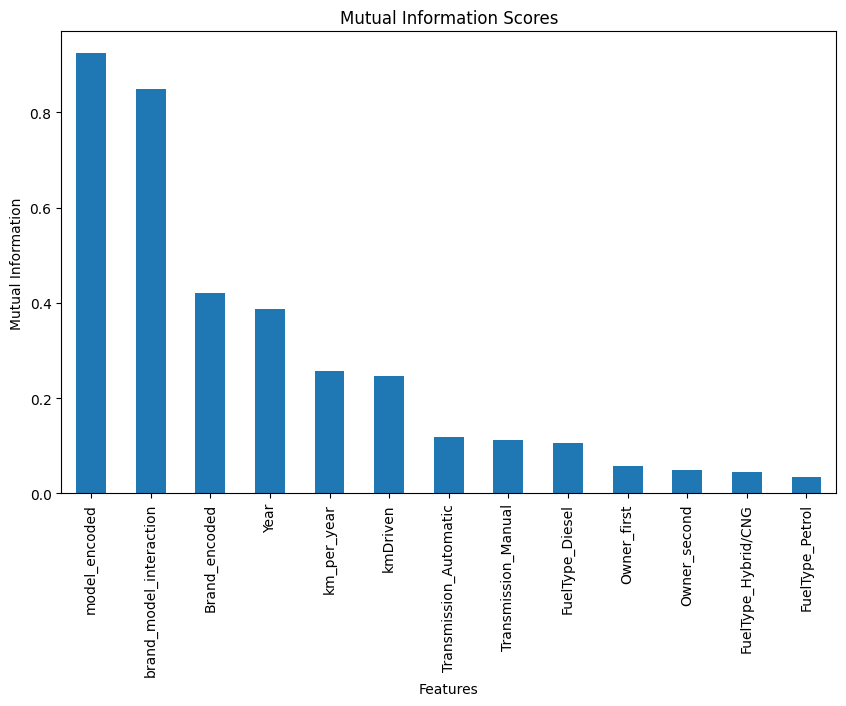

In [54]:
# Plot mutual information scores
plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='bar')
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()


In [55]:
df['AskPrice'].mean()

906671.01675024

### Scale the Data

In [56]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)       # Transform test data

# Convert back to DataFrame to preserve column names and index
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# <span style="color:#5E6997">Predict Car Asking Prices</span> <a class="anchor" id="predict"></a>

Before I start the models, I will define K-Folds so that all models are using the same folds of data.

In [57]:
from sklearn.model_selection import KFold

# Define a shared KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=0)

### Here is a Decision Tree Model for the dataset.

In [58]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)

# Define RMSE as the evaluation metric
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation
cv_scores = cross_val_score(
    estimator=dt_model,
    X=X_train,
    y=y_train,
    scoring=rmse_scorer,
    cv=kf  # Use the shared KFold object
)

# Fit the model on the entire training set
dt_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test = dt_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# Display results
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean RMSE (Cross-Validation): {cv_scores.mean():.3f}")
print(f"Standard Deviation of RMSE (Cross-Validation): {cv_scores.std():.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

Cross-Validation RMSE Scores: [380708.42283117 366753.81942611 355939.04221355 421036.85526949
 421275.00683846]
Mean RMSE (Cross-Validation): 389142.629
Standard Deviation of RMSE (Cross-Validation): 27293.238
Test RMSE: 374524.724


Mean RMSE (Cross-Validation): 389,143

Standard Deviation of RMSE (Cross-Validation): 27,293

Test RMSE: 374,525

### Now I will try a Random Forest Regressor model.

Random Forest Base Model

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the RandomForestRegressor with default parameters
rf = RandomForestRegressor(random_state=0)

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"RMSE: {test_rmse:.3f}")


RMSE: 331747.568


Random Forest Base Model RMSE: 331,748

Random Forest Fine-Tuned Model

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Define the RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

# Define hyperparameter distribution
param_dist = {
    'n_estimators': [10, 25, 50, 100],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}

# param_dist = {
#     'n_estimators': [100],
#     'max_depth': [20],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1],
#     'max_features': [1.0]
# }

# Define the scoring metric
scoring = 'neg_mean_squared_error'  # Directly use sklearn's predefined scoring metric
rmse_scorer = make_scorer(mean_squared_error, squared=False)  # Custom RMSE scorer

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_dist,  # Pass the grid of hyperparameters
    scoring=scoring,
    cv=kf,  # Use the shared KFold
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best parameters
best_params = grid_search.best_params_

# Check if the score is valid and convert to RMSE
best_cv_neg_mse = grid_search.best_score_  # Best score (negative MSE)
if best_cv_neg_mse < 0:  # Ensure it is negative
    best_cv_rmse = np.sqrt(-best_cv_neg_mse)  # Convert to RMSE
else:
    raise ValueError("Unexpected positive or NaN best_score_ in GridSearchCV.")

# Train a new model with the best parameters on the full training set
best_model = RandomForestRegressor(**best_params, random_state=0)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print("Best Parameters:", best_params)
print(f"Best Cross-Validation RMSE: {best_cv_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation RMSE: 300931.949
Test RMSE: 331813.208


Best Parameters: {'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Cross-Validation RMSE: 300,932

Test RMSE: 331,813

### CatBoost Model

Base Case CatModel

In [61]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Define the model with default hyperparameters
cat_model = CatBoostRegressor(random_seed=0, verbose=0)

# Train the model on the training data
cat_model.fit(X_train, y_train)

# Predict on the test set
y_pred = cat_model.predict(X_test)

# Compute RMSE on the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"RMSE: {rmse:.3f}")


RMSE: 313247.399


Base Case CatBoost Model RMSE: 313,247

Fin-Tuned CatBoost Model

In [62]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the model
cat_model = CatBoostRegressor(
    random_seed=0,
    verbose=0
)

# Define the parameter grid
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0, 0.5, 1]
}

# param_grid = {
#     'iterations': [1000],
#     'learning_rate': [0.1],
#     'depth': [6],
#     'l2_leaf_reg': [1],
#     'bagging_temperature': [0]
# }

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
best_rmse = (-grid_search.best_score_) ** 0.5
print(f"Best RMSE: {best_rmse:.3f}")

# Evaluate the best model on a test set
y_pred = grid_search.best_estimator_.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse:.3f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bagging_temperature': 0, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best RMSE: 282365.582
Test RMSE: 299303.140


Best Parameters: {'bagging_temperature': 0, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

Best RMSE: 282,366

Test RMSE: 299,303

<div class="alert alert-block alert-info"> 💡 INSIGHT: This is the best result. Cross-Validation Mean RMSE = 282,056. Cross-Validation Standard Deviation of RMSE = 9,053. Test RMSE = 299,303.</div>

XGBoost Models

In [63]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost Regressor with default hyperparameters
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=0
)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_test = xgb_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# Display results
print(f"RMSE: {test_rmse:.3f}")


RMSE: 319515.698


XGBoost Base Model RMSE: 319,516

XGBoost Fine-Tuned Model

In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    objective='reg:squarederror',  # Use squared error loss for regression
    random_state=0               
)

# Define parameter grid
param_grid = {
    'n_estimators': [200], # also tried [50, 100]
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 1, 10],
    'reg_lambda': [1, 10, 100]
}

# param_grid = {
#     'n_estimators': [200], # also tried [50, 100]
#     'learning_rate': [0.1],
#     'max_depth': [6],
#     'subsample': [0.8],
#     'colsample_bytree': [0.7],
#     'gamma': [0],
#     'reg_alpha': [0],
#     'reg_lambda': [1]
# }

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best parameters and the best RMSE score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

# Train the model with the best parameters on the entire training set
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred_test = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# Display results
print("Best Parameters:", best_params)
print(f"Best RMSE (Cross-Validation): {best_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")


Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'reg_alpha': 10, 'reg_lambda': 1, 'subsample': 0.9}
Best RMSE (Cross-Validation): 293136.009
Test RMSE: 309513.425


Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}

Best RMSE (Cross-Validation): 294,915

Test RMSE: 310,854

### Tensorflow Model

In [65]:
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
# Ensure X and y are NumPy arrays
X = X_train.values
y = y_train.values

In [67]:
# Simplified function to build the model with default hyperparameters
def build_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),  # Explicit input layer
        Dense(128, activation='relu'),  # Default hidden units
        Dropout(0.2),  # Default dropout rate
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')  # Output layer for regression
    ])
    model.compile(
        optimizer=Adam(learning_rate=0.001),  # Default learning rate
        loss='mean_squared_error',  # MSE for regression
        metrics=['mae']  # Mean Absolute Error
    )
    return model

# Perform cross-validation
fold_rmse = []
for train_idx, val_idx in kf.split(X):
    # Split the data
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    
    # Build and train the model with default hyperparameters
    model = build_model(input_shape=X_train_fold.shape[1])
    
    # Add early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,  # Stop if no improvement for 10 epochs
        restore_best_weights=True
    )
    
    # Train the model
    model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=50,  # Default epochs
        batch_size=32,  # Default batch size
        verbose=0,
        callbacks=[early_stopping]
    )
    
    # Predict on the validation set
    y_val_pred = model.predict(X_val_fold)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    fold_rmse.append(rmse)

# Calculate the average RMSE and standard deviation
mean_rmse = np.mean(fold_rmse)
std_rmse = np.std(fold_rmse)

# Display the results
print(f"Cross-Validation RMSE Scores: {fold_rmse}")
print(f"Average RMSE: {mean_rmse:.3f}")
print(f"Standard Deviation of RMSE: {std_rmse:.3f}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Cross-Validation RMSE Scores: [449568.48532772454, 453123.74158565083, 462348.91380636743, 474534.02424669795, 448476.47752073203]
Average RMSE: 457610.328
Standard Deviation of RMSE: 9768.251


Tensorflow Base Model RMSE: 457,149

Fine-Tuned Tensorflow Model

In [68]:
def build_model(input_shape, learning_rate=0.001, dropout_rate=0.2, hidden_units=64):
    model = Sequential([
        Input(shape=(input_shape,)),  # Explicit Input layer
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model


In [69]:
# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.2, 0.3],
    'hidden_units': [64, 128],
    'batch_size': [16, 32],
    'epochs': [20, 50]
}

# Initialize results storage
results = []

In [70]:
# Grid search over hyperparameters
for params in ParameterGrid(param_grid):
    fold_rmse = []
    print(f"Testing parameters: {params}")
    
    # Perform cross-validation
    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        
        # Build model with current hyperparameters
        model = build_model(
            input_shape=X_train_fold.shape[1],
            learning_rate=params['learning_rate'],
            dropout_rate=params['dropout_rate'],
            hidden_units=params['hidden_units']
        )
        
        # Add early stopping callback
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,  # Stop if no improvement for 10 epochs
            restore_best_weights=True
        )
        
        # Train model
        history = model.fit(
            X_train_fold, y_train_fold,
            validation_data=(X_test, y_test),
            epochs=params['epochs'],
            batch_size=params['batch_size'],
            verbose=3,
            callbacks=[early_stopping]
        )
        
        # Predict on validation set
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        fold_rmse.append(rmse)
    
    # Store the mean RMSE for this parameter combination
    mean_rmse = np.mean(fold_rmse)
    print(f"Mean RMSE for parameters {params}: {mean_rmse:.2f}")
    results.append((params, mean_rmse))

# Identify the best hyperparameters
best_params, best_rmse = min(results, key=lambda x: x[1])
print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_rmse:.3f}")

Testing parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 20, 'hidden_units': 64, 'learning_rate': 0.001}
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 

Best Parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 50, 'hidden_units': 128, 'learning_rate': 0.01}

Best RMSE: 430,098

# <span style="color:#5E6997">Conclusion (temp text)</span> <a class="anchor" id="conclusion"></a>

The comprehensive analysis performed on the dataset using various machine learning models provided valuable insights into their effectiveness for classification and regression tasks. Each model was systematically evaluated to determine its suitability for the specific characteristics of the data. Here are the key conclusions drawn from this study:

### Key Findings
**Model Performance**:
Support Vector Machines and K Nearest Neighbors tied for first at 91.8 %.

**Model Selection**:
The selection of the model was guided by the nature of the dataset and the specific requirements of the task. Models like SVM and XGBoost were particularly effective for complex patterns, while simpler models like Logistic Regression provided fast and efficient solutions for less complex data.

**Evaluation Metrics**:
Accuracy was primarily used to assess model performance along with confusion matrices that provided deeper insights into the classification behavior of each model. These metrics facilitated a straightforward comparison across models.

### Recommendations
**Model Tuning**: Further tuning of model parameters could potentially enhance performance, particularly in reducing overfitting and improving model generalization.

**Feature Engineering**: Continued exploration and engineering of features could uncover more significant predictors and improve model accuracy.

**Cross-Validation**: Implementing cross-validation would ensure a more robust evaluation of models, mitigating the risk of dataset-specific biases affecting the performance metrics.
Future Work

**Advanced Techniques**: Exploring more advanced machine learning techniques and feature selection methods could uncover deeper insights and potentially improve model performance.

**Hybrid Models**: Combining the strengths of different models through techniques like model stacking or ensemble methods could lead to better predictive performance.

**Deployment Considerations**: The next steps would involve considering the deployment aspects of these models, ensuring that they not only perform well on historical data but also adapt effectively to new, unseen data in a production environment.